# Football Network Analysis

Imports

In [1]:
# Pandas to reimport csv data
import pandas as pd

# Numpy for array manipulation
import numpy as np

# NetworkX
import networkx as nx

import ndlib.models.ModelConfig as mc

import numpy.random as rd

In [2]:
Transfer = nx.read_gml("networks/transfers_transfer_network.gml")

In [3]:
print(nx.info(Transfer))

Name: transfer
Type: MultiDiGraph
Number of nodes: 1124
Number of edges: 2913
Average in degree:   2.5916
Average out degree:   2.5916


# Money Infection analysis

### Calculate node infection probability

$$ Res = 0.8\cdot \text{in_degree[money]}+0.2\cdot \text{out_degree[money]} $$

$$ beta = Res/MaxRes $$ 

In [67]:
max_out_transfer = {}
max_in_transfer = {} 

for u,v in Transfer.edges():
    for link_i in Transfer.edge[u][v]:
        try:
            if(Transfer.edge[u][v][link_i]['transferValue'] > max_out_transfer[u]):
                max_out_transfer[u] = float(Transfer.edge[u][v][link_i]['transferValue'])
        except:
            max_out_transfer[u] = float(Transfer.edge[u][v][link_i]['transferValue'])
        
        try:
            if(Transfer.edge[u][v][link_i]['transferValue'] > max_in_transfer[v]):
                max_in_transfer[v] = float(Transfer.edge[u][v][link_i]['transferValue'])
        except:
            max_in_transfer[v] = float(Transfer.edge[u][v][link_i]['transferValue'])

In [61]:
len(max_out_transfer)

952

In [62]:
len(max_in_transfer)

669

In [68]:
for node in Transfer.nodes():
    try:
        max_out_transfer[node]
    except:
        max_out_transfer[node]=0
    try:
        max_in_transfer[node]
    except:
        max_in_transfer[node]=0

In [100]:
beta = {}
for node in Transfer.nodes():
    if max_out_transfer[node] == 0 : 
        coef_out_transfer = 0
    else : 
        coef_out_transfer = np.log(1/max_out_transfer[node]+1)
    if max_in_transfer[node] == 0 : 
        coef_in_transfer =0
    else : 
        coef_in_transfer = np.log(1/max_in_transfer[node]+1)
    beta[node] = 0.2*coef_out_transfer+0.8*coef_in_transfer

In [113]:
beta = {}
for node in Transfer.nodes():
    beta[node] = 0.8*max_out_transfer[node]+0.2*max_in_transfer[node]

In [114]:
print(beta)

{'Nordsjaelland': 220000.0, 'Chievo Verona': 460000.0, 'Hannover 96': 1600000.0, 'GZ R&F;': 5960000.0, 'Rosenborg BK': 1680000.0, 'Bor. Dortmund': 1950000.0, 'Norrköping': 630000.0, 'Viborg FF': 340000.0, 'FC Utrecht': 2860000.0, 'Bursaspor': 2412000.0, 'Steaua Bukarest': 850000.0, 'Cagliari Calcio': 430000.0, 'Sampdoria': 11200000.0, 'Swansea': 19728000.0, 'Genoa': 2060000.0, 'FSV Frankfurt': 260000.0, 'Greuther Fürth': 180000.0, 'Stoke City': 1899000.0, "Bor. M'gladbach": 880000.0, '1. FC Köln': 2700000.0, 'Besiktas': 6400000.0, 'Sevilla FC': 5160000.0, 'Leicester': 5740000.0, 'Cerezo Osaka': 1100000.0, 'HB CFFC': 720000.0, 'GZ Evergrande': 6000000.0, 'Djurgardens IF': 1363000.0, 'FC Groningen': 360000.0, 'Saint-Étienne': 900000.0, 'FC Augsburg': 1100000.0, 'VfB Stuttgart': 1160000.0, "1.FC K'lautern": 100000.0, 'Bay. Leverkusen': 4560000.0, 'FC St. Pauli': 1650000.0, 'Galatasaray': 1340000.0, 'Bayern Munich ': 18000000.0, 'Man City': 1264000.0, 'Man Utd': 22440000.0, 'VfL Wolfsburg'

In [115]:
max_beta_key = max(beta, key=lambda i: beta[i])
max_beta = beta[max_beta_key]
max_beta_key

'Juventus'

In [116]:
max_beta

84280000.0

In [117]:
max_beta = max(list(beta.values()))
for node in Transfer.nodes():
    beta[node] /= max_beta

In [118]:
print(beta)

{'Nordsjaelland': 0.0026103464641670624, 'Chievo Verona': 0.005457997152349312, 'Hannover 96': 0.018984337921214997, 'GZ R&F;': 0.07071665875652587, 'Rosenborg BK': 0.019933554817275746, 'Bor. Dortmund': 0.023137161841480777, 'Norrköping': 0.007475083056478406, 'Viborg FF': 0.004034171808258187, 'FC Utrecht': 0.03393450403417181, 'Bursaspor': 0.02861888941623161, 'Steaua Bukarest': 0.010085429520645468, 'Cagliari Calcio': 0.00510204081632653, 'Sampdoria': 0.132890365448505, 'Swansea': 0.23407688656858092, 'Genoa': 0.02444233507356431, 'FSV Frankfurt': 0.003084954912197437, 'Greuther Fürth': 0.0021357380161366873, 'Stoke City': 0.02253203607024205, "Bor. M'gladbach": 0.01044138585666825, '1. FC Köln': 0.03203607024205031, 'Besiktas': 0.07593735168485999, 'Sevilla FC': 0.061224489795918366, 'Leicester': 0.0681063122923588, 'Cerezo Osaka': 0.013051732320835311, 'HB CFFC': 0.00854295206454675, 'GZ Evergrande': 0.07119126720455624, 'Djurgardens IF': 0.016172282866635027, 'FC Groningen': 0.0

In [119]:
min_beta_key = min(beta, key=lambda i: beta[i])
min_beta_key

'FC Liefering'

In [120]:
# reverse the percentage to be applicable as a threshold value: 
for node in Transfer.nodes():
    beta[node] = 1-beta[node]

In [121]:
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics.ThresholdModel as th
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend

# Model selection
model.reset()
model = th.ThresholdModel(Transfer)

# Model Configuration
cfg = mc.Configuration()

for node in Transfer.nodes():
    cfg.add_node_configuration("threshold", node, beta[node])

#cfg.add_model_parameter('beta', 0.01)
#cfg.add_node_set_configuration('beta', beta)

cfg.add_model_parameter("percentage_infected", 0.05)
model.set_initial_status(cfg)

# Simulation execution
iterations = model.iteration_bunch(200)
trends = model.build_trends(iterations)

# visualization of evolution
viz = DiffusionTrend(model, trends)
viz.plot("Money_infection.png")

<img src="Money_infection.png">

In [130]:
infected = [key for key in model.status.keys() if model.status[key]==1]
infected

['Hannover 96',
 'FSV Frankfurt',
 'Cerezo Osaka',
 'GZ Evergrande',
 'Lazio',
 'SH Shenxin',
 'Trabzonspor',
 'Sporting CP',
 'AC Milan',
 'Bröndby IF',
 'KV Oostende',
 'Brentford',
 'Arsenal',
 'Genclerbirligi',
 'Cherno More',
 'Diósgyőr',
 'Cracovia Kraków',
 'Arezzo',
 'Al-Gharafa',
 'Al-Ahli',
 'Juventus',
 'Terek Grozny',
 'GKS Belchatow',
 'Chesterfield FC',
 'Anzhi',
 'Ipswich',
 'Dinamo Zagreb',
 'IF Elfsborg',
 'PSV U21',
 'Odds BK',
 'Roda JC',
 'Virtus Lanciano',
 'Újpest FC',
 'FK Sarajevo',
 'Bradford City',
 'Dinamo Bukarest',
 'Empoli U19',
 'Belenenses',
 'Najran',
 'Strømsgodset',
 'Brighton',
 'K. Offenbach',
 'Stuttg. Kickers',
 'Burton Albion',
 'ES Zarzis',
 'Fleetwood Town',
 'Incheon Utd.',
 'FC Zürich U21',
 "M'gladbach II",
 'Enisey',
 'Zenit 2 S-Pb',
 'KS Samara',
 'KV Kortrijk',
 'Neman Grodno',
 'FK Slutsk',
 'El-Jaish',
 'Al-Duhail',
 'Wisla Plock',
 'Platinum Stars',
 'Everton U21',
 'FC Wacker',
 'Hansa Rostock',
 'Wehen Wiesbaden',
 'HRB Yiteng',
 'Re

### Discussion
The threshold model from NDlib, even though it allows to differentiate the way the infection spreads on the network is biased, because the threshold level is difficult to compute such that it can have sense. The threshold needs to be in the interval [0 1] and the difficult task is to compute a value in this interval that would capture the fact that the clubs spending a lot money, with a higher chance of being infected have low value and the majority of the graph would not spread easily. Proper scale is a big issue here. 

Also the node differentiation is not the best appropriate property. The best would to define a probability in the edges of the network that would differentiate the way the infection spreads. Sadly this is not possible to do with NDlib so we implemented our own disease spreading model. 

# Transform a MultiDiGraph into a DiGraph

For this analysis it was necessary to transform the initial Multi-Directed Graph into a Directed Graph. 

In [4]:
def getDiGraph(G):
    """
    Transforms a Multidirected network into a directed one.
    Between two nodes, sum the value of each transfer (if exist) and the number of transfers.
    """
    # Create the network
    dG = nx.DiGraph()
    dG.name = G.name
    # Add nodes and edges iteratively
    for u,v,data in G.edges(data=True):
        dG.add_node(u, competition=G.node[u]['competition'])
        dG.add_node(v, competition=G.node[v]['competition'])
        val = float(data['transferValue']) if 'transferValue' in data else 0.0
        if dG.has_edge(u,v):
            dG[u][v]['transferValue'] += val
            dG[u][v]['nbr'] += 1
        else:
            dG.add_edge(u, v, transferValue=val, nbr=1)
    return dG

In [5]:
DiTransfer = getDiGraph(Transfer)
nx.write_gml(DiTransfer, "networks/single_directed_monetary_network.gml")
print(nx.info(DiTransfer))

Name: transfer
Type: DiGraph
Number of nodes: 1124
Number of edges: 2733
Average in degree:   2.4315
Average out degree:   2.4315


In [6]:
DiTransfer.edges(data = True)[0]

('Odense BK', 'FC Basel', {'nbr': 1, 'transferValue': 1500000.0})

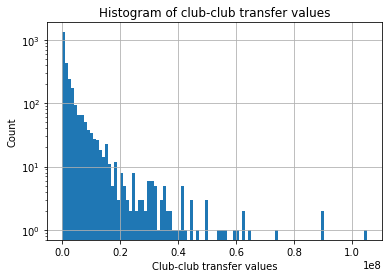

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

club_club_transfer_values = list(nx.get_edge_attributes(DiTransfer,'transferValue').values())

plt.hist(club_club_transfer_values, bins=100, normed=0) #normed indicates Probability Density (sum =1)
plt.xlabel('Club-club transfer values')
plt.ylabel('Count')
plt.yscale('log')
plt.title('Histogram of club-club transfer values')
plt.grid(True)
plt.savefig('figures/hist_transfer_values.png')
plt.show()

From this it can be seen that a vast majority of the transfer happen with relatively low amounts of money. 
Here we want to analyze the high end of transfers.

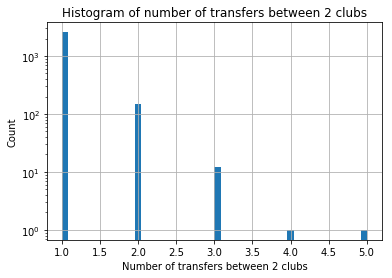

In [8]:
club_club_transfer_nbrs = list(nx.get_edge_attributes(DiTransfer,'nbr').values())

plt.hist(club_club_transfer_nbrs, bins=50, normed=0) #normed indicates Probability Density (sum =1)
plt.xlabel('Number of transfers between 2 clubs')
plt.ylabel('Count')
plt.yscale('log')
plt.title('Histogram of number of transfers between 2 clubs')
plt.grid(True)
plt.savefig('figures/hist_nbr_DiGraph.png')
plt.show()

This graph shows that the difference between the Directed graph and the Multi-Directed one is relatively small since few links were aggregated with each other.

## Money infection analysis second approach - differentiated infection probability

Here we are interested to understand how money flows into the network. 
Especially since the prices of the players seem to constantly grow, we consider that a "money infection" is spreading in the network. If a club pays a huge amount of money for a player, then another club will sell to that club at higher price because they see that they still buy. Similarly, when a club sells a player for a huge amount of money, the club is now rich and can now buy other players for huge amounts of money. This is how we consider the disease spreading. 

### Get the first set of infected nodes


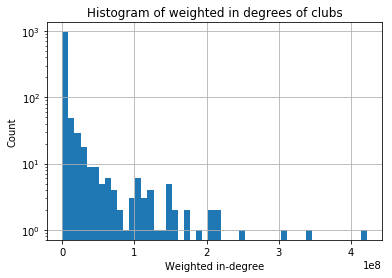

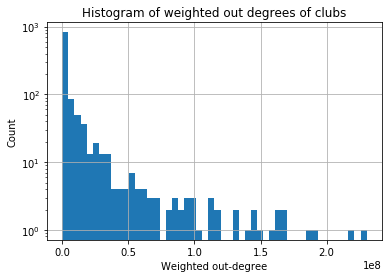

In [9]:
# to get the first set of infected nodes

in_deg = DiTransfer.in_degree(weight = 'transferValue')

hist_in_deg = list(in_deg.values())

plt.hist(hist_in_deg, bins=50, normed=0) #normed indicates Probability Density (sum =1)
plt.xlabel('Weighted in-degree')
plt.ylabel('Count')
plt.yscale('log')
plt.title('Histogram of weighted in degrees of clubs')
plt.grid(True)
plt.show()

out_deg = DiTransfer.out_degree(weight = 'transferValue')

hist_out_deg = list(out_deg.values())

plt.hist(hist_out_deg, bins=50, normed=0) #normed indicates Probability Density (sum =1)
plt.xlabel('Weighted out-degree')
plt.ylabel('Count')
plt.yscale('log')
plt.title('Histogram of weighted out degrees of clubs')
plt.grid(True)
plt.show()    

The in- and out- degree distributions have similar characteristics, with the same extreme values observed.

To determine the initial infected we calculate a money infection coefficient the following way: 

$$ \text{Infection coefficient} = 0.8\cdot \text{in_degree[money]}+0.2\cdot \text{out_degree[money]} $$

This formula is a weighted average of the in- and out- degrees of a particular node meaning the following: 
"If the club spends a lot money (*players in_degree*) and receives as well a lot of money (*player out_degree*), then it is more likely that this club will be infected." 

The weight is stronger for the amount of money a club is able to spend, because we believe it is the main component of the infection. In a simplified way we believe the behavior to be something: "Oh, you are able to spend that much money for that guy? My player has similar performances, so I will also sell it to you at a similar exhorbitant price.

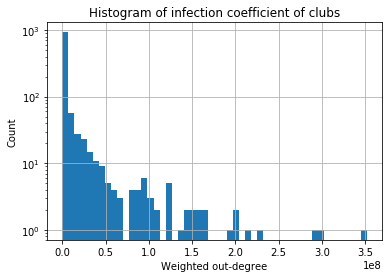

In [10]:
Infection_coef = {}
for node in DiTransfer.nodes():
    Infection_coef[node] = 0.2*out_deg[node]+0.8*in_deg[node]
    
hist_infection_coefs = list(Infection_coef.values())

plt.hist(hist_infection_coefs, bins=50, normed=0) #normed indicates Probability Density (sum =1)
plt.xlabel('Weighted out-degree')
plt.ylabel('Count')
plt.yscale('log')
#plt.xscale('log')
plt.title('Histogram of infection coefficient of clubs')
plt.grid(True)
plt.savefig('figures/hist_infection_coef.png')
plt.show()   

In [12]:
G = nx.read_gml("networks/single_directed_monetary_network.gml")

in_deg = DiTransfer.in_degree(weight = 'transferValue')
out_deg = DiTransfer.out_degree(weight = 'transferValue')

Infection_coef = {}
for node in G.nodes():
    Infection_coef[node] = 0.8*in_deg[node]+0.2*out_deg[node]

Infection_coef_sorted = [(Infection_coef[link_key], link_key) for link_key in Infection_coef.keys()]
Infection_coef_sorted.sort(reverse=True)
#print(centrality_sorted)
max30Infection_coef = [key for value,key in Infection_coef_sorted[:30]]
print('30 Highest Infection coef :\n')
for club in max30Infection_coef:
    print(club)

30 Highest Infection coef :

Man City
Man Utd
Juventus
Chelsea
Atlético Madrid
Inter
Liverpool
Valencia CF
Paris SG
Monaco
Newcastle
Spurs
FC Barcelona
AS Roma
VfL Wolfsburg
Bor. Dortmund
Bayern Munich 
Watford
Southampton
Aston Villa
SSC Napoli
Arsenal
Real Madrid
Villarreal CF
Leicester
Sevilla FC
AC Milan
Everton
GZ Evergrande
JS Suning


Not very surprisingly, all the top hot clubs pop out on this list of the 30 highest likely to be infected clubs.

### Subgraph of the richest clubs

In [13]:
# specify the threshold
threshold = 10000000
RichTransfers = DiTransfer.copy()
RichTransfers.name = 'RichTransfers'
#G_com_reduced = community.induced_graph(partition, G, weight='TotalValue')

# Find the edges with weight less than the threshold
edges_to_remove = [(u,v) for u,v,d in RichTransfers.edges(data=True) if d['transferValue'] < threshold]

# Remove these edges from the graph
RichTransfers.remove_edges_from(edges_to_remove)

#largest_cc = max(nx.weakly_connected_components(RichTransfers), key=len)
RichClubs = DiTransfer.copy()
RichClubs.name = 'RichClubs'
nbunch = [n for n in RichClubs.nodes() if n not in max30Infection_coef]
RichClubs.remove_nodes_from(nbunch)

print(nx.info(RichTransfers),'\n')
print(nx.info(RichClubs))

Name: RichTransfers
Type: DiGraph
Number of nodes: 1124
Number of edges: 255
Average in degree:   0.2269
Average out degree:   0.2269 

Name: RichClubs
Type: DiGraph
Number of nodes: 30
Number of edges: 100
Average in degree:   3.3333
Average out degree:   3.3333


### From the initial clubs, infect others

In [14]:
def get_infected_club(G, club):
    """
    This function evaluates which club to infect when a buy decision of a particular club is decided.
    We assume here that a club only buys players from the previous clubs he bought his players off
    and that since it will spend a lot of money (because it is infected), it is more likely for him to buy 
    from a club were it previously had bought with a lot money.
    """
    infection_Proba = {}
    # It will buy a player from it's predecessors relative to 
    # the amount of money he already paid to them
    Potentially_infected = G.predecessors(club)
    if len(Potentially_infected) ==0:
        # meaning that the node has no predecessor in the graph
        # It can infect any node with equal probability
        random_infection = rd.choice(G.nodes(),1)[0]
        # print('random :',random_infection)
        return random_infection
        # return None
    else: 
        for pre_node in Potentially_infected:
        # transfer value of each predecessors
            infection_Proba[pre_node] = G.edge[pre_node][club]['transferValue']

        infection_Proba_sum = np.sum(list(infection_Proba.values()))
        for coef in infection_Proba.keys():
        # A probability of infection of each club from (0 to 1, with the sum = 1)
            infection_Proba[coef] = infection_Proba[coef]/infection_Proba_sum

        # Based on the probability now a cumulative probability function is built
        order_key = []
        order_val = []
        #cumulated_proba = {}

        for key in infection_Proba.keys():
            order_key.append(key)
            val = infection_Proba[key]
            order_val.append(val)

            try: 
                order_val[-1] = order_val[-2]+order_val[-1]
                #cumulated_proba[key] = order_val[-1]
            except:
                pass
                #cumulated_proba[key] = val

        # A random number is picked between 0 and 1, if it lower than the cumulative function in the ordered value
        # the club corresponding to that position is infected
        x = rd.random()
        for i in range(0,len(order_val)):
            #print(x,' :',order_val[i])
            if(x < order_val[i]):
                #print(order_key)
                #print(i)
                #print(len(order_val),len(order_key))
                return order_key[i]
    
    print(Potentially_infected)
    print(x)
    return 'toto'

In [18]:
iterations = 200
# Initial conditions
infected_clubs = [max30Infection_coef[0]]
# probability of an infected club to buy an expensive player at 1 time step
buy_proba = 0.01

for i in range(0,iterations):
    for club in infected_clubs:
        if(rd.random() < buy_proba):
            # The infected club will buy a new expensive player from it's usual partners
            # and therefore infect it as well
            club_to_infect = get_infected_club(DiTransfer,club)
            # Check if the club to infect was already infected or not
            if(club_to_infect in infected_clubs or club_to_infect is None):
                pass
            else: 
                infected_clubs.append(club_to_infect)
        else: pass
        
infected_clubs

['Man City', 'VfL Wolfsburg']

In [67]:
# Initial conditions
rd.seed(14)
# probability of an infected club to buy an expensive player at 1 time step
buy_proba = 0.01
# number of iterations of spreading process
iterations = 200
# number of times an infection is repeated with the same initial conditions
average_over = 100

avg_infection_spread = {}

for initial_condition in max30Infection_coef:
    
    results = []
    for k in range(0,average_over):
        infected_clubs = [initial_condition]
        
        for i in range(0,iterations):
            for club in infected_clubs:
                if(rd.random() < buy_proba):
                    # The infected club will buy a new expensive player from it's usual partners
                    # and therefore infect it as well
                    club_to_infect = get_infected_club(DiTransfer,club)
                    # Check if the club to infect was already infected or not
                    if(club_to_infect in infected_clubs or club_to_infect is None):
                        pass
                    else: 
                        infected_clubs.append(club_to_infect)
                else: pass
        results.append(len(infected_clubs))
        #print(results)
    stats = {}
    stats['mean'] = np.mean(results)
    stats['std'] = np.std(results)
    avg_infection_spread[initial_condition] = stats
    #avg_infection_spread[initial_condition]['std'] = np.std(results)

In [68]:
df = pd.DataFrame(avg_infection_spread).T
df

,mean,std
AC Milan,5.75,4.671991
AS Roma,6.76,5.674716
Arsenal,5.65,4.922144
Aston Villa,6.05,4.607331
Atlético Madrid,5.77,4.244655
Bayern Munich,6.47,5.371136
Bor. Dortmund,5.08,4.139275
Chelsea,5.99,4.535405
Everton,6.01,4.926449
FC Barcelona,5.44,4.870975


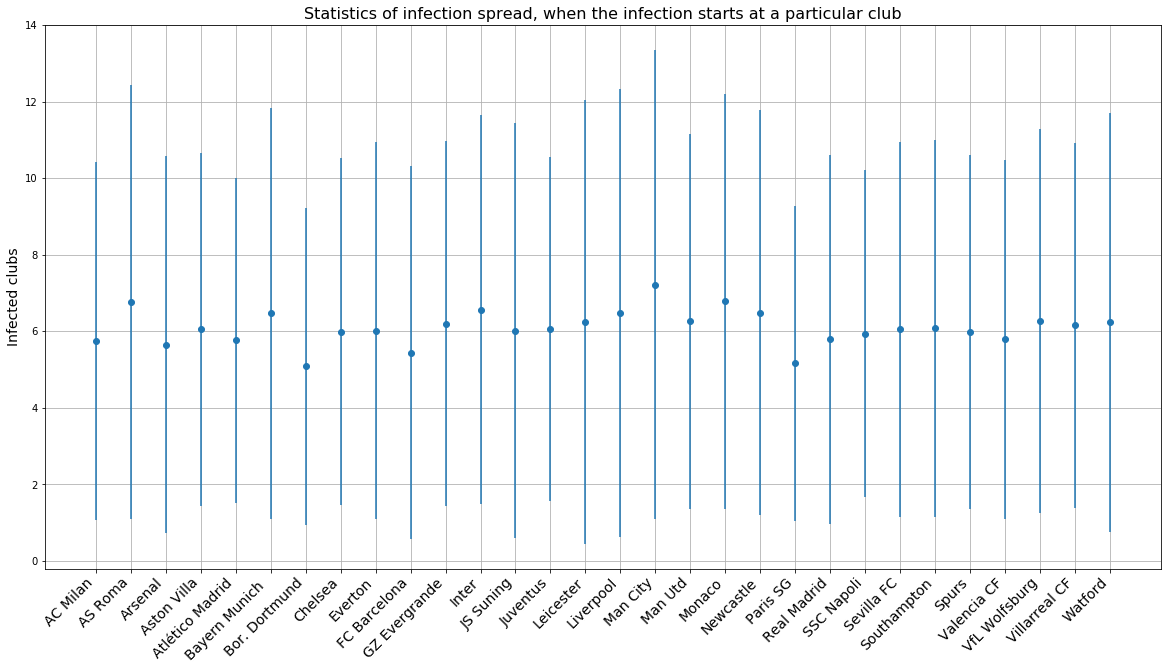

In [69]:
# plot
plt.figure(figsize=(20,10))
plt.errorbar(range(0,len(df)), df['mean'], yerr=df['std'], fmt='o')
#ax.set_xlabel(xlabel)
plt.ylabel('Infected clubs',fontsize =14)
#plt.set_yscale('yscale')
plt.title('Statistics of infection spread, when the infection starts at a particular club',fontsize =16)
plt.xticks(range(0,len(df)), df.index, rotation=45 ,fontsize =14, ha='right')
plt.grid(True)
#plt.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# rotate and align the tick labels so they look better
plt.tick_params('labelright')
#plt.autofmt_xdate()
plt.savefig('figures/Statistics.png')
plt.show()


### Results of the money infection analysis 

The algorithm developed spreads a money epidemia on the RichClubs network with every club as an initial condition. 

For each different initial conditions the analysis is repeated a bunch of times to average out the random effect of the disease spread. The mean and standard deviation of the epidemia can be observed in the final plot. 

The main clubs spreading the most the disease are Paris SG, Atlético Madrid, Man Utd. Those are all big club that make huge transactions. But overall strong tendencies cannot be observed on this data because of the huge standard deviation. There is no statistical evidence observable. 

The conclusion of that is that the model does not fit properly the reality and should be further modified to put a sort of a limit of spreading based on economic power. 

### Second model of money infection

In [74]:
infection_coef_sum = np.sum(list(Infection_coef.values()))
for coef in Infection_coef.keys():
# A probability of infection of each club from (0 to 1, with the sum = 1)
    Infection_coef[coef] = Infection_coef[coef]/infection_coef_sum

# Based on the probability now a cumulative probability function is built
order_key = []
order_val = []
#cumulated_proba = {}

for key in Infection_coef.keys():
    order_key.append(key)
    val = Infection_coef[key]
    order_val.append(val)

    try: 
        order_val[-1] = order_val[-2]+order_val[-1]
        #cumulated_proba[key] = order_val[-1]
    except:
        pass
        #cumulated_proba[key] = val



In [75]:
def pick_a_club(order_key, order_val):
    # A random number is picked between 0 and 1, if it lower than the cumulative function in the ordered value
    # the club corresponding to that position is infected
    x = np.random.random_sample()
    for i in range(0,len(order_val)):
        #print(x,' :',order_val[i])
        if(x < order_val[i]):
            #print(order_key)
            #print(i)
            #print(len(order_val),len(order_key))
            return order_key[i]

In [76]:
initial_status = {}
for node in DiTransfer.nodes():
    initial_status[node] = 0

In [122]:
# Initial conditions
rd.seed(None)
# probability of an infected club to buy an expensive player at 1 time step
buy_proba = 0.01
# number of iterations of spreading process
iterations = 200
# number of times an infection is repeated with the same initial conditions
average_over = 10000

df_m2 = pd.DataFrame(np.zeros((average_over, len(DiTransfer.nodes()))), columns = list(DiTransfer.nodes()))

for k in range(0,average_over):
    
    # random initial infected club
    infected_clubs = [rd.choice(G.nodes(),1)[0]]
    df_m2.loc[k][infected_clubs[0]] = 1
    
    for i in range(0,iterations):
        for club in infected_clubs:
            if(np.random.random_sample() < buy_proba):
                # The infected club will buy a new expensive player from it's usual partners
                # and therefore infect it as well
                club_to_infect = pick_a_club(order_key, order_val)
                # Check if the club to infect was already infected or not
                if(club_to_infect in infected_clubs or club_to_infect is None):
                    pass
                else: 
                    df_m2.loc[k][club_to_infect] = 1
                    infected_clubs.append(club_to_infect)
            else: pass
df_m2.sample(10)

,Odense BK,FC Basel,Genclerbirligi,FC Groningen,Lech Poznan,Hamburger SV,VfB Stuttgart,TSG Hoffenheim,1.FSV Mainz 05,Stade Rennais,...,Víkingur,Joinville,Táchira,Almere City,Atalanta U19,Ventforet Kofu,TuS Ennepetal,Käpylän,Metalurg Skopje,FC Flora
8426,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9804,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4886,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7936,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
220,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4380,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3865,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8235,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2609,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [123]:
output = df_m2.sum(axis=0).nlargest(n=50)
output[:]

Man City           1908.0
Man Utd            1531.0
Juventus           1493.0
Chelsea            1218.0
Atlético Madrid    1159.0
Inter              1101.0
Valencia CF        1094.0
Liverpool          1076.0
Paris SG            937.0
FC Barcelona        920.0
Monaco              915.0
Newcastle           886.0
VfL Wolfsburg       868.0
Spurs               859.0
AS Roma             838.0
Bor. Dortmund       811.0
Southampton         786.0
Watford             743.0
Bayern Munich       725.0
Aston Villa         717.0
SSC Napoli          692.0
Arsenal             672.0
Sevilla FC          654.0
Real Madrid         653.0
Leicester           639.0
Villarreal CF       618.0
Everton             600.0
AC Milan            596.0
FC Porto            572.0
Benfica             567.0
Bay. Leverkusen     547.0
JS Suning           534.0
West Ham            531.0
GZ Evergrande       527.0
Swansea             525.0
RB Leipzig          517.0
Crystal Palace      512.0
FC Schalke 04       503.0
Sunderland  

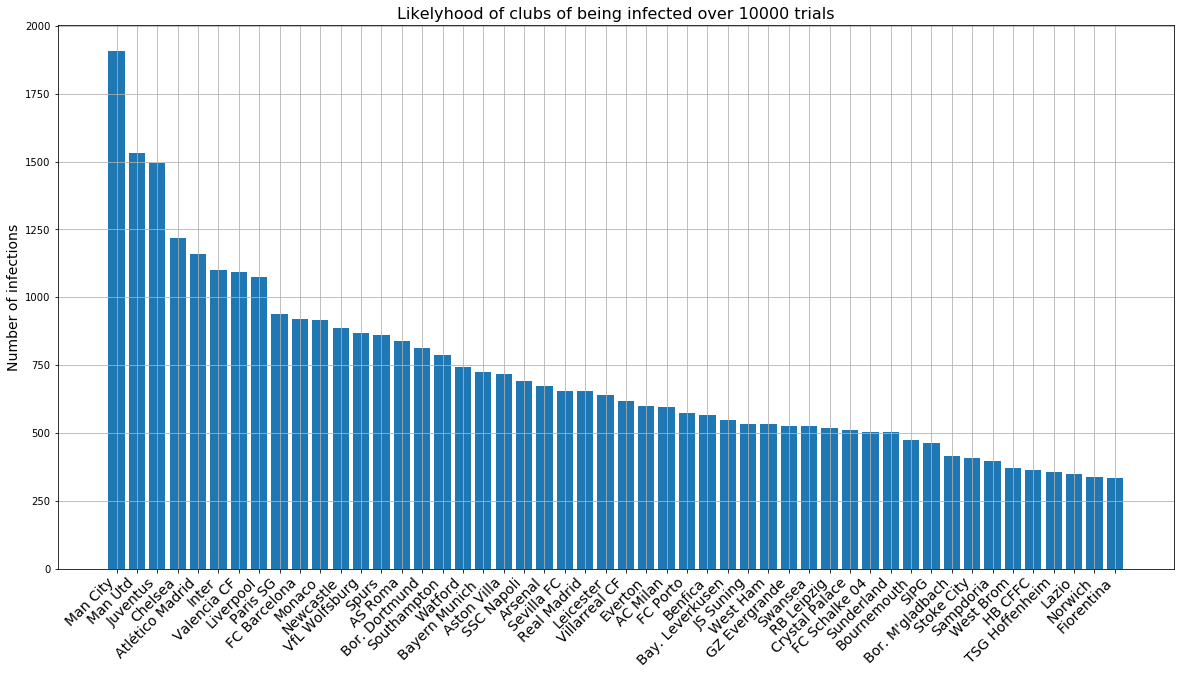

In [124]:
# plot
plt.figure(figsize=(20,10))
plt.bar(range(0,len(output)), output)
#ax.set_xlabel(xlabel)
plt.ylabel('Number of infections',fontsize =14)
#plt.set_yscale('yscale')
plt.title('Likelyhood of clubs of being infected over 10000 trials',fontsize =16)
plt.xticks(range(0,len(output)), list(output.keys()), rotation=45 ,fontsize =14, ha='right')
plt.grid(True)
#plt.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# rotate and align the tick labels so they look better
plt.tick_params('labelright')
#plt.autofmt_xdate()
plt.savefig('figures/Second_model_stats.png')
plt.show()

Number of clubs that get infected in each epidemias in average

In [125]:
out = df_m2.sum(axis=1)
np.mean(out)

6.9243

In [110]:
Infection_coef_sorted = sorted(Infection_coef.items(), key=lambda x: x[1], reverse = True)
Infection_coef_sorted

[('Man City', 0.034572716085290452),
 ('Man Utd', 0.029099602624282232),
 ('Juventus', 0.028523981901206662),
 ('Chelsea', 0.022592081626261976),
 ('Atlético Madrid', 0.020830434592581742),
 ('Inter', 0.019472056156972888),
 ('Liverpool', 0.019432358176071123),
 ('Valencia CF', 0.019200459079714287),
 ('Paris SG', 0.016574889649775874),
 ('Monaco', 0.015969593703352946),
 ('Newcastle', 0.015660460416429808),
 ('Spurs', 0.015340714797978477),
 ('FC Barcelona', 0.015040032071346309),
 ('AS Roma', 0.014647297194939951),
 ('VfL Wolfsburg', 0.014384622337151353),
 ('Bor. Dortmund', 0.014325664939772496),
 ('Bayern Munich ', 0.013304719341828631),
 ('Watford', 0.01234312419057948),
 ('Southampton', 0.012324257823418247),
 ('Aston Villa', 0.012181875708748307),
 ('SSC Napoli', 0.012113092078472975),
 ('Arsenal', 0.012076440229769119),
 ('Real Madrid', 0.010484590500539992),
 ('Villarreal CF', 0.010453146555271268),
 ('Leicester', 0.010330318644065316),
 ('Sevilla FC', 0.01031263142485166),
 (

In [111]:
coef = []
club_coef = []

for t in Infection_coef_sorted: 
    coef.append(t[1])
    club_coef.append(t[0])
    
club_coef

['Man City',
 'Man Utd',
 'Juventus',
 'Chelsea',
 'Atlético Madrid',
 'Inter',
 'Liverpool',
 'Valencia CF',
 'Paris SG',
 'Monaco',
 'Newcastle',
 'Spurs',
 'FC Barcelona',
 'AS Roma',
 'VfL Wolfsburg',
 'Bor. Dortmund',
 'Bayern Munich ',
 'Watford',
 'Southampton',
 'Aston Villa',
 'SSC Napoli',
 'Arsenal',
 'Real Madrid',
 'Villarreal CF',
 'Leicester',
 'Sevilla FC',
 'AC Milan',
 'Everton',
 'GZ Evergrande',
 'JS Suning',
 'Benfica',
 'Crystal Palace',
 'Bay. Leverkusen',
 'FC Porto',
 'West Ham',
 'Sunderland',
 'RB Leipzig',
 'SIPG',
 'FC Schalke 04',
 'Swansea',
 'Bournemouth',
 'Sampdoria',
 "Bor. M'gladbach",
 'Stoke City',
 'HB CFFC',
 'West Brom',
 'Lazio',
 'Norwich',
 'Middlesbrough',
 'TSG Hoffenheim',
 'Olympique Lyon',
 'Fiorentina',
 'Sporting CP',
 'Marseille',
 'Hamburger SV',
 'Sassuolo',
 'Burnley',
 'SH Shenhua',
 'Torino',
 'AFC Ajax',
 'Udinese Calcio',
 'Fenerbahce',
 'Al-Ahli (UAE)',
 'RSC Anderlecht',
 'Derby',
 'SD Luneng',
 'FC Augsburg',
 'Werder Bremen

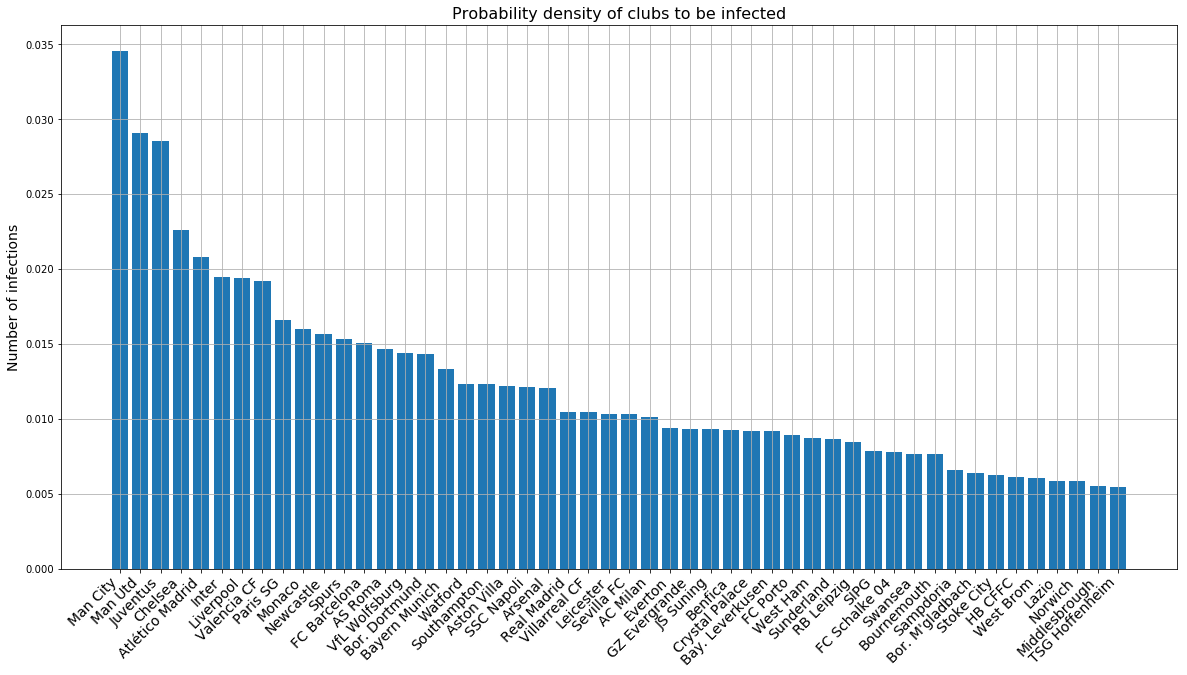

In [121]:
# plot
plt.figure(figsize=(20,10))
plt.bar(range(50), coef[:50])
#ax.set_xlabel(xlabel)
plt.ylabel('Number of infections',fontsize =14)
#plt.set_yscale('yscale')
plt.title('Probability density of clubs to be infected',fontsize =16)
plt.xticks(range(50), club_coef[:50], rotation=45 ,fontsize =14, ha='right')
plt.grid(True)
#plt.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# rotate and align the tick labels so they look better
plt.tick_params('labelright')
#plt.autofmt_xdate()
plt.savefig('figures/Second_model_probas.png')
plt.show()

In [105]:
Infection_coef_sorted = []

for key in Infection_coef.keys():
    Infection_coef_sorted.append([Infection_coef[key], key])
Infection_coef_sorted    

[[0.00010121019883370376, 'Odense BK'],
 [0.0029444306874290612, 'FC Basel'],
 [0.00037099924923935138, 'Genclerbirligi'],
 [0.00054908989425508415, 'FC Groningen'],
 [0.00027051619163998686, 'Lech Poznan'],
 [0.0046949740779362774, 'Hamburger SV'],
 [0.0032668293887624421, 'VfB Stuttgart'],
 [0.0054457375761586373, 'TSG Hoffenheim'],
 [0.0037565688363228105, '1.FSV Mainz 05'],
 [0.0013391190191317621, 'Stade Rennais'],
 [0.0019790033053502854, 'Dynamo Kyiv'],
 [0.012076440229769119, 'Arsenal'],
 [0.0038705531379219331, 'FC Augsburg'],
 [0.00022109024017071211, 'Colorado'],
 [0.0077725502211125896, 'FC Schalke 04'],
 [0.00054535592575442318, "1.FC K'lautern"],
 [0.00058957397378856565, 'FC Midtjylland'],
 [0.0026756832177104403, 'QPR'],
 [0.00057974774089208946, 'Birmingham'],
 [0.0015211008523744992, 'Feyenoord'],
 [0.00021912499359141689, 'Chicago Fire'],
 [0.00018768104832269338, '1.FC Heidenheim'],
 [0.00028895020455377599, 'Konyaspor'],
 [0.00022325201140793683, 'Djurgardens IF'],

# Managers analysis

In [89]:
Managers = nx.Graph()
Managers = nx.read_gml("networks/managers.gml")
print(nx.info(Managers))

Name: 
Type: Graph
Number of nodes: 4976
Number of edges: 47204
Average degree:  18.9727


In [90]:
Managers.edges(data = True)[0]

('jiri-kotrba', 'petr-ulicny', {'club': 'Sigma Olomouc'})

In [91]:
# import the Louvain algorithm
import community as community 

# compute the best partition
partition = community.best_partition(Managers)

size = float(len(set(partition.values())))
print('The number of communities: ', size)

The number of communities:  113.0


In [93]:
com_length = {}

for node in partition.keys():
    try: 
        com_length[partition[node]]+=1;
    except: 
        com_length[partition[node]]=1;

<Container object of 113 artists>

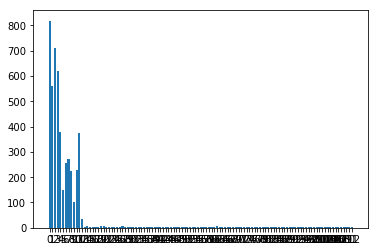

In [94]:
plt.bar(list(com_length.keys()), list(com_length.values()), tick_label = range(0,113))

In [95]:
Community_Subgraphs = {}

for com in range(0,113):
    nbunch = [nodes for nodes in partition.keys() if partition[nodes] == com]
    Community_Subgraphs[com] = G.subgraph(nbunch)

In [100]:
for i in range(0,11):
    print(nx.info(Community_Subgraphs[i]))

Name: 
Type: Graph
Number of nodes: 818
Number of edges: 5083
Average degree:  12.4279
Name: 
Type: Graph
Number of nodes: 559
Number of edges: 7455
Average degree:  26.6726
Name: 
Type: Graph
Number of nodes: 712
Number of edges: 3587
Average degree:  10.0758
Name: 
Type: Graph
Number of nodes: 619
Number of edges: 2376
Average degree:   7.6769
Name: 
Type: Graph
Number of nodes: 378
Number of edges: 3374
Average degree:  17.8519
Name: 
Type: Graph
Number of nodes: 151
Number of edges: 1329
Average degree:  17.6026
Name: 
Type: Graph
Number of nodes: 255
Number of edges: 3798
Average degree:  29.7882
Name: 
Type: Graph
Number of nodes: 270
Number of edges: 2344
Average degree:  17.3630
Name: 
Type: Graph
Number of nodes: 223
Number of edges: 3102
Average degree:  27.8206
Name: 
Type: Graph
Number of nodes: 103
Number of edges: 994
Average degree:  19.3010
Name: 
Type: Graph
Number of nodes: 227
Number of edges: 604
Average degree:   5.3216


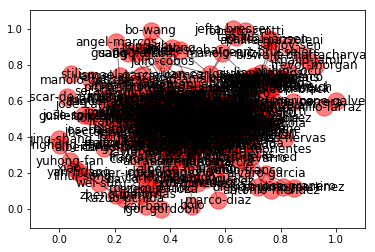

In [101]:
fig = plt.figure()
pos = nx.spring_layout(Community_Subgraphs[7])
# Plot nodes
nx.draw_networkx(Community_Subgraphs[7], pos, alpha=0.5, labels = None)